In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from ltu_ili_testing import SBI_Fitter
import numpy as np
from unyt import Jy


device = 'cuda:0'#


grid_path = '/home/tharvey/work/output/grid_yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1.hdf5'


Device: cuda
Pytorch version: 2.4.1
ROCM HIP version: 6.1.40093-e3dc58bf0


In [210]:
# Draw depths from a normal distribution.
depth_centers = [30 if fitter.raw_photometry_names[i].endswith('W') else 29.5 for i in range(len(fitter.raw_photometry_names))]
depth_sigma = [0.2 if fitter.raw_photometry_names[i].endswith('W') else 0.3 for i in range(len(fitter.raw_photometry_names))]
# Draw 20 possible depths from a normal distribution
depths = np.random.normal(loc=depth_centers, scale=depth_sigma, size=(20, len(fitter.raw_photometry_names)))
depths_jy = 10**((depths-8.90)/-2.5) * Jy # 30 AB mag in all 22 filters

# Set 5 possible options - no missing bands, missing M bands, missing M bands except F410M, missing M bands except F410M and F335M, missing M bands except F410M and F070W
missing_bands = np.empty((5, len(fitter.raw_photometry_names)))
missing_bands[0] = 0
missing_bands[1] = [True if band.endswith('M') else False for band in fitter.raw_photometry_names]
missing_bands[2] = [True if band.endswith('M') and band not in ['NIRCam.F410M'] else False for band in fitter.raw_photometry_names]
missing_bands[3] = [True if band.endswith('M') and band not in ['NIRCam.F410M', 'NIRCam.F335M'] else False for band in fitter.raw_photometry_names]
missing_bands[4] = [True if (band.endswith('M') and band not in ['NIRCam.F410M']) or band == 'NIRCam.F070W' else False for band in fitter.raw_photometry_names]

fitter.create_feature_array_from_raw_photometry(extra_features=[],
                                                normalize_method=None, 
                                                scatter_fluxes=False, 
                                                include_errors_in_feature_array=False,
                                                simulate_missing_fluxes=True,
                                                include_flags_in_feature_array=True,
                                                missing_flux_options=missing_bands,
                                                depths=depths_jy)    



---------------------------------------------
Features: 40 features over 10000 samples
---------------------------------------------
Feature: Min - Max
---------------------------------------------
NIRCam.F070W: 26.340 - 99.000 AB
NIRCam.F090W: 26.214 - 50.000 AB
NIRCam.F115W: 26.263 - 50.000 AB
NIRCam.F140M: 25.501 - 99.000 AB
NIRCam.F150W: 25.797 - 43.098 AB
NIRCam.F162M: 26.641 - 99.000 AB
NIRCam.F182M: 27.009 - 99.000 AB
NIRCam.F200W: 26.668 - 43.366 AB
NIRCam.F210M: 27.083 - 99.000 AB
NIRCam.F250M: 27.170 - 99.000 AB
NIRCam.F277W: 26.821 - 43.371 AB
NIRCam.F300M: 27.206 - 99.000 AB
NIRCam.F335M: 26.866 - 99.000 AB
NIRCam.F356W: 26.837 - 43.736 AB
NIRCam.F360M: 27.167 - 99.000 AB
NIRCam.F410M: 26.158 - 99.000 AB
NIRCam.F430M: 25.574 - 99.000 AB
NIRCam.F444W: 26.704 - 43.913 AB
NIRCam.F460M: 26.971 - 99.000 AB
NIRCam.F480M: 27.196 - 99.000 AB
flag_NIRCam.F070W: 0.000 - 1.000 None
flag_NIRCam.F090W: 0.000 - 0.000 None
flag_NIRCam.F115W: 0.000 - 0.000 None
flag_NIRCam.F140M: 0.000 - 1

(array([[50.        , 36.44597351, 50.        , ..., 42.90564521,
         35.87993228, 40.28416838],
        [50.        , 33.10384147, 41.75090067, ..., 37.69363989,
         33.7015149 , 36.69277172],
        [37.74805496, 33.95189307, 31.86437706, ..., 36.55027424,
         33.92047275, 36.20109959],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        , ...,  1.        ,
          0.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        , ...,  1.        ,
          0.        ,  0.        ]], shape=(40, 10000)),
 ['NIRCam.F070W',
  'NIRCam.F090W',
  'NIRCam.F115W',
  'NIRCam.F140M',
  'NIRCam.F150W',
  'NIRCam.F162M',
  'NIRCam.F182M',
  'NIRCam.F200W',
  'NIRCam.F210M',
  'NIRCam.F250M',
  'NIRCam.F277W',
  'NIRCam.F300M',
  'NIRCam.F335M',
  'NIRCam.F356W',
  'NIRCam.F360M',
  'NIRCam.F410M',
  'NIRCam.F430M',
  'NIRCam.F444W',
  'NIRCam.F460M',
  'NIRCam.F4

/home/tharvey/work/ltu-ili_testing/models/yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1_test2/yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1_test2_NPE3_params.pkl
Splitting dataset with 10000 samples into training and testing sets with 0.80 train fraction.
---------------------------------------------
Prior ranges:
---------------------------------------------
redshift: 5.00 - 12.00
log_mass: 4.00 - 9.00
sps_yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1/min_age: 0.00 - 30.00
---------------------------------------------


INFO:root:MODEL INFERENCE CLASS: NPE


Creating nsf network with NPE engine and lampe backend.
     hidden_features: 50
     num_transforms: 6


INFO:root:Training model 1 / 1.


[2025-06-03 12:47:45,630] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)


175 epochs [03:14,  1.11s/ epochs, loss=-1.6, loss_val=-0.97]    
INFO:root:It took 195.5807707309723 seconds to train models.
INFO:root:Saving model to /home/tharvey/work/ltu-ili_testing/models/yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1_test2
INFO:root:Sampling models with [1000] samples each.


Time to train model(s): 0:03:15.796783


Drawing 1000 posterior samples: 1983it [00:00, 73294.43it/s]            
INFO:root:Saving single posterior plot to /home/tharvey/work/ltu-ili_testing/models/yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1_test2/plots/yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1_test2_517_plot_single_posterior.jpg...
100%|██████████| 2000/2000 [00:34<00:00, 57.37it/s]
INFO:root:Saving coverage plot to /home/tharvey/work/ltu-ili_testing/models/yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1_test2/plots/plot_coverage.jpg...
INFO:root:Saving ranks histogram to /home/tharvey/work/ltu-ili_testing/models/yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1_test2/plots/ranks_histogram.jpg...
INFO:root:Mean logprob: 1.0831e+00Median logprob: 1.2408e+00
INFO:root:Saving true logprobs to /home/tharvey/work/ltu-ili_testing/models/yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1_test2/plots/true_logprobs.npy...
INFO:root:Sav

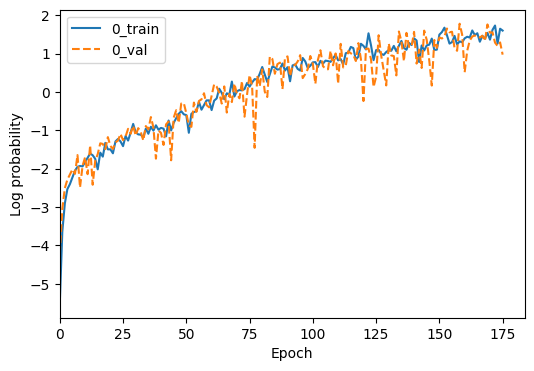

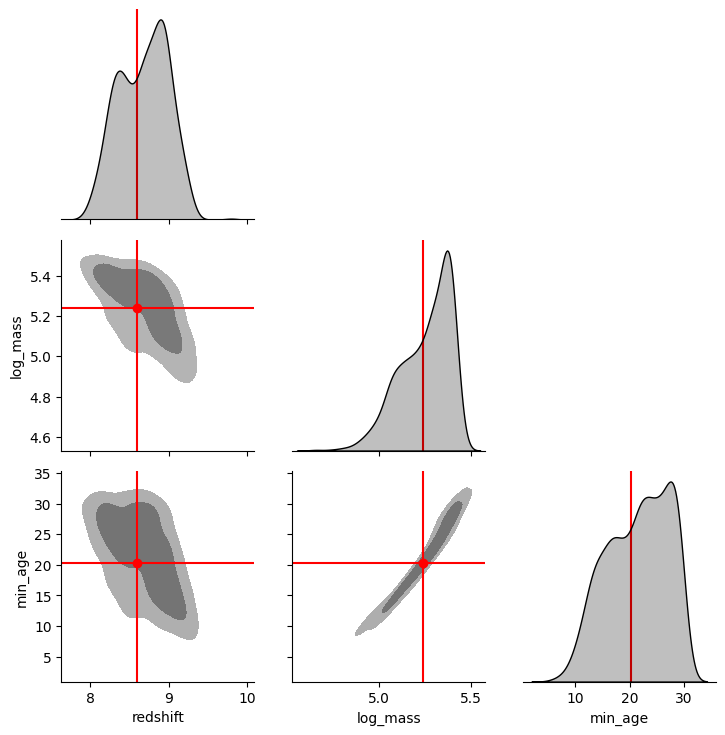

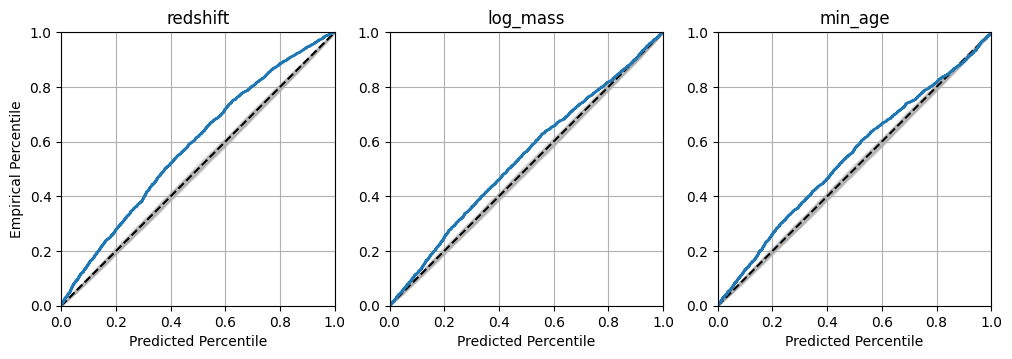

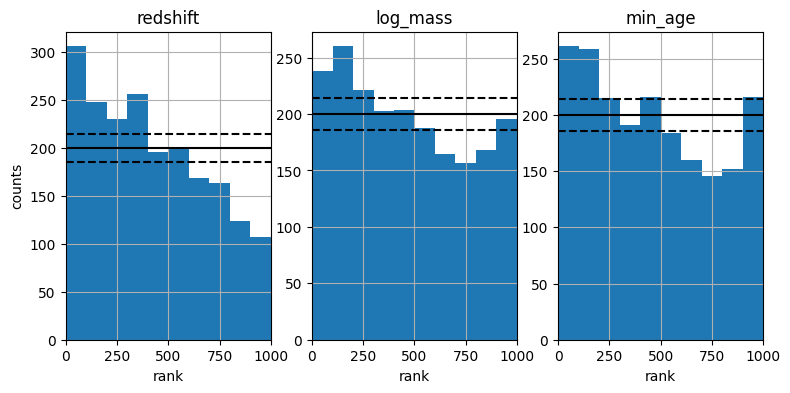

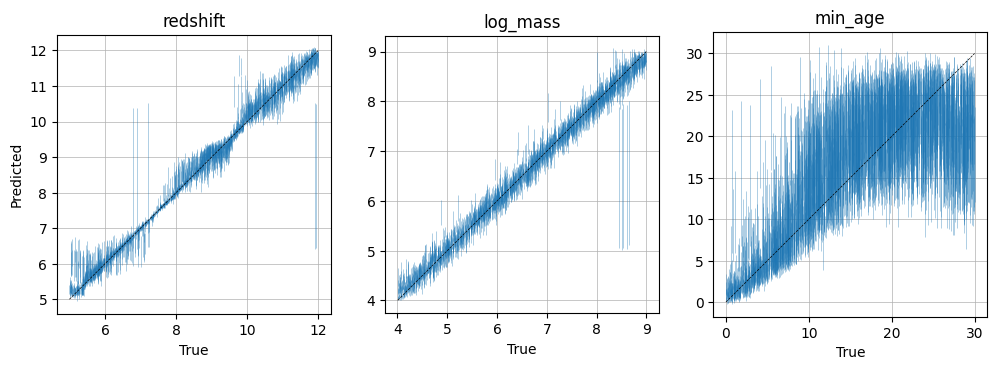

INFO:matplotlib.mathtext:Substituting symbol E from STIXNonUnicode


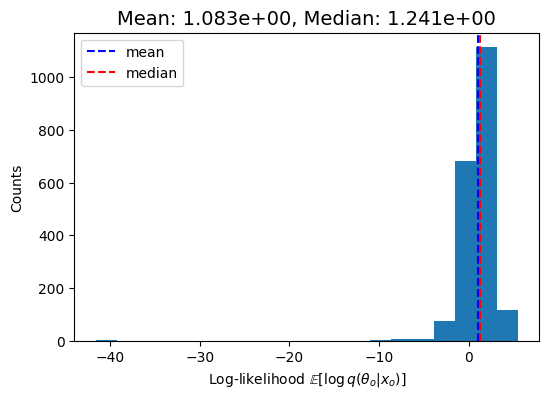

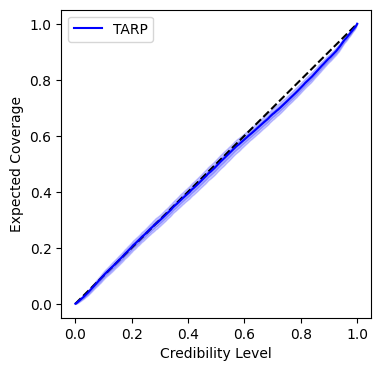

In [5]:
npe2, npe2_stats = fitter.run_single_sbi(engine='NPE', learning_rate=5e-4, set_self=True, model_type='nsf', backend='lampe', num_transforms=6,
                                    plot=True, name_append='_NPE3', save_model=True)

GLIMPSE Pop III

In [101]:
filters = ['F090W', 'F115W', 'F150W', 'F200W', 'F277W', 'F356W', 'F410M', 'F444W', 'F480M']
phot = np.array([3.17, 4.44, 4.74, 3.54, 3.29, 3.94, 0.71, 4.85, 12.54])
errors = np.array([0.60, 0.52, 0.61, 0.62, 0.71, 0.74, 1.21, 0.67, 2.47])
import astropy.units as u
# mask

mask = np.array([True if f.replace('NIRCam.', '') in filters else False for f in fitter.raw_photometry_names])


err = np.log10(1+ np.abs((errors / phot))) # Convert to log10 flux error
phot = phot * u.nJy

phot = phot.to(u.ABmag).value

print(err)
phot_fill = 99
j = 0
full_phot = []
full_err = []
full_flags = []
for i in range(len(fitter.raw_photometry_names)):
    if mask[i]:
        full_phot.append(float(phot[j]))
        full_err.append(float(err[j]))
        full_flags.append(False)
        j += 1
    else:
        full_phot.append(phot_fill)
        full_err.append(phot_fill)
        full_flags.append(True)

full_array = np.array(full_phot  + full_flags, dtype=np.float32)
full_array

[0.07528209 0.04809871 0.05257544 0.07009007 0.08486409 0.07474963
 0.43204288 0.05619734 0.07808316]


array([99.      , 30.147352, 29.781542, 99.      , 29.710554, 99.      ,
       99.      , 30.027493, 99.      , 99.      , 30.10701 , 99.      ,
       99.      , 29.911259, 99.      , 31.771854, 99.      , 29.685646,
       99.      , 28.654257,  1.      ,  0.      ,  0.      ,  1.      ,
        0.      ,  1.      ,  1.      ,  0.      ,  1.      ,  1.      ,
        0.      ,  1.      ,  1.      ,  0.      ,  1.      ,  0.      ,
        1.      ,  0.      ,  1.      ,  0.      ], dtype=float32)

In [17]:
fitter._X_test[0]

array([50.      , 50.      , 50.      , 99.      , 30.957167, 99.      ,
       99.      , 31.366098, 99.      , 99.      , 31.699553, 99.      ,
       99.      , 31.908342, 99.      , 99.      , 99.      , 32.04368 ,
       99.      , 99.      ,  0.      ,  0.      ,  0.      ,  1.      ,
        0.      ,  1.      ,  1.      ,  0.      ,  1.      ,  1.      ,
        0.      ,  1.      ,  1.      ,  0.      ,  1.      ,  1.      ,
        1.      ,  0.      ,  1.      ,  1.      ], dtype=float32)

In [19]:
params = fitter.sample_posterior(X_test=full_array)

quantiles = np.quantile(params, [0.16, 0.5, 0.84], axis=0)

print(quantiles)

INFO:root:Sampling models with [1000] samples each.
Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

[[ 6.15429111  4.73719692  4.5690271 ]
 [ 8.45157766  6.4480803  14.78514242]
 [10.78966846  8.21757942 24.96745567]]


In [33]:
import os

path = '/home/tharvey/work/ltu-ili_testing/models/yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1_test2/yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1_test2_NPE3_posterior.pkl'

second_fitter = SBI_Fitter.init_from_hdf5('yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1_test3',
                                grid_path)

second_fitter.load_model_from_pkl(path);

In [99]:

filters = ['F090W', 'F115W', 'F150W', 'F200W', 'F277W', 'F356W', 'F410M', 'F444W', 'F480M']
filters = [f'NIRCam.{f}' for f in filters]

# Draw depths from a normal distribution.
depth_centers = [40 if second_fitter.raw_photometry_names[i].endswith('W') else 40 for i in range(len(filters))]
depth_sigma = [0.2 if second_fitter.raw_photometry_names[i].endswith('W') else 0.3 for i in range(len(filters))]
# Draw 20 possible depths from a normal distribution
depths = np.random.normal(loc=depth_centers, scale=depth_sigma, size=(20, len(filters)))
depths_jy = 10**((depths-8.90)/-2.5) * Jy # 30 AB mag in all 22 filters


 # Remove the first option (no missing bands) as it is not needed for the second fitter
second_fitter.create_feature_array_from_raw_photometry(extra_features=[],
                                                normalize_method=None, 
                                                scatter_fluxes=False, 
                                                include_errors_in_feature_array=False,
                                                depths=depths_jy,
                                                photometry_to_remove=[band for band in second_fitter.raw_photometry_names if band not in filters]);



Removing 11 photometry filters: ['NIRCam.F070W' 'NIRCam.F140M' 'NIRCam.F162M' 'NIRCam.F182M'
 'NIRCam.F210M' 'NIRCam.F250M' 'NIRCam.F300M' 'NIRCam.F335M'
 'NIRCam.F360M' 'NIRCam.F430M' 'NIRCam.F460M']
---------------------------------------------
Features: 9 features over 10000 samples
---------------------------------------------
Feature: Min - Max
---------------------------------------------
NIRCam.F090W: 26.214 - 50.000 AB
NIRCam.F115W: 26.263 - 50.000 AB
NIRCam.F150W: 25.797 - 43.098 AB
NIRCam.F200W: 26.668 - 43.366 AB
NIRCam.F277W: 26.821 - 43.371 AB
NIRCam.F356W: 26.837 - 43.736 AB
NIRCam.F410M: 26.158 - 43.799 AB
NIRCam.F444W: 26.704 - 43.913 AB
NIRCam.F480M: 26.088 - 44.226 AB
---------------------------------------------


INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 1.


/home/tharvey/work/ltu-ili_testing/models/yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1_test3/yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1_test3_NPE1_no_unc_params.pkl
Using previously split dataset.
---------------------------------------------
Prior ranges:
---------------------------------------------
redshift: 5.00 - 12.00
log_mass: 4.00 - 9.00
sps_yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1/min_age: 0.00 - 30.00
---------------------------------------------
Creating nsf network with NPE engine and lampe backend.
     hidden_features: 50
     num_transforms: 6


118 epochs [02:11,  1.11s/ epochs, loss=-2.15, loss_val=-2.21]  
INFO:root:It took 131.39879059791565 seconds to train models.
INFO:root:Saving model to /home/tharvey/work/ltu-ili_testing/models/yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1_test3
INFO:root:Sampling models with [1000] samples each.


Time to train model(s): 0:02:11.421694


Drawing 1000 posterior samples: 1991it [00:00, 100641.86it/s]           
INFO:root:Saving single posterior plot to /home/tharvey/work/ltu-ili_testing/models/yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1_test3/plots/yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1_test3_1060_plot_single_posterior.jpg...
100%|██████████| 2000/2000 [00:34<00:00, 57.32it/s]
INFO:root:Saving coverage plot to /home/tharvey/work/ltu-ili_testing/models/yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1_test3/plots/plot_coverage.jpg...
INFO:root:Saving ranks histogram to /home/tharvey/work/ltu-ili_testing/models/yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1_test3/plots/ranks_histogram.jpg...
INFO:root:Mean logprob: 1.7140e+00Median logprob: 2.0349e+00
INFO:root:Saving true logprobs to /home/tharvey/work/ltu-ili_testing/models/yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1_test3/plots/true_logprobs.npy...
INFO:root:Sa

(LampeEnsemble(
   (posteriors): ModuleList(
     (0): LampeNPE(
       (nde): NPE(
         (flow): NSF(
           (transform): LazyComposedTransform(
             (0): MaskedAutoregressiveTransform(
               (base): MonotonicRQSTransform(bins=8)
               (order): [0, 1, 2]
               (hyper): MaskedMLP(
                 (0): MaskedLinear(in_features=12, out_features=50, bias=True)
                 (1): ReLU()
                 (2): MaskedLinear(in_features=50, out_features=50, bias=True)
                 (3): ReLU()
                 (4): MaskedLinear(in_features=50, out_features=69, bias=True)
               )
             )
             (1): MaskedAutoregressiveTransform(
               (base): MonotonicRQSTransform(bins=8)
               (order): [2, 1, 0]
               (hyper): MaskedMLP(
                 (0): MaskedLinear(in_features=12, out_features=50, bias=True)
                 (1): ReLU()
                 (2): MaskedLinear(in_features=50, out_features=50, bi

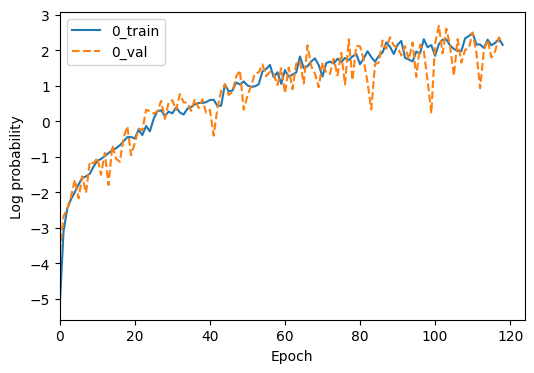

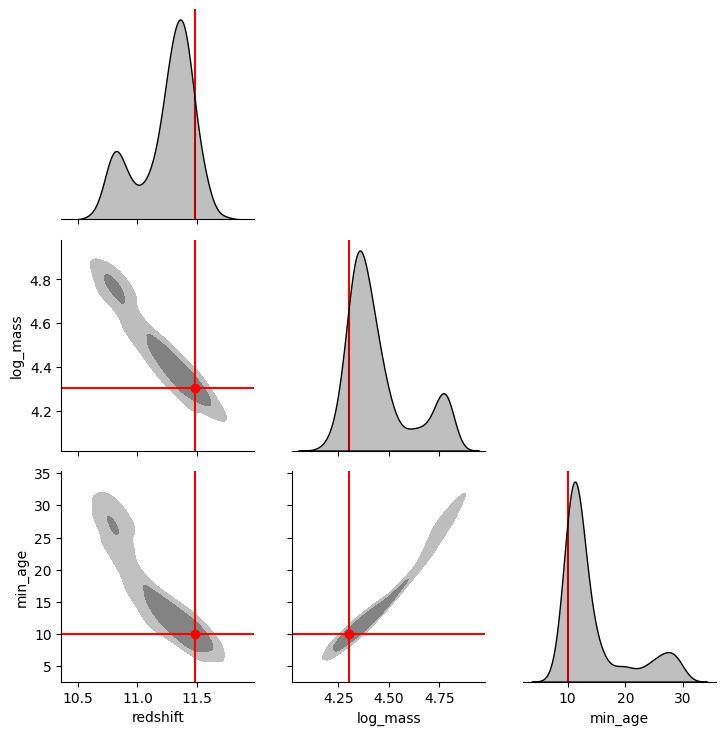

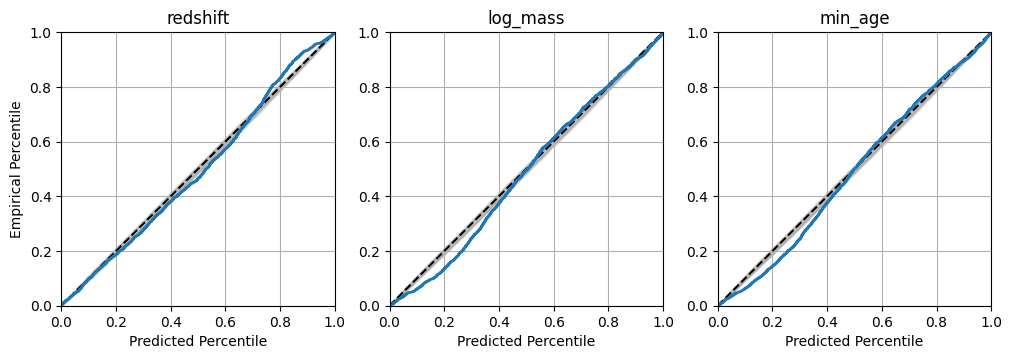

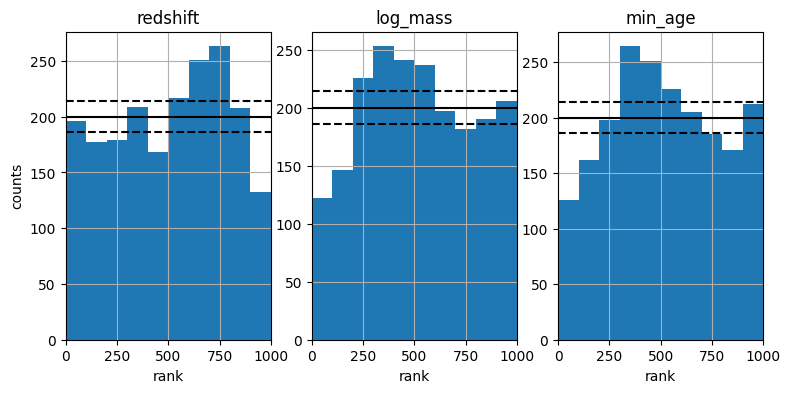

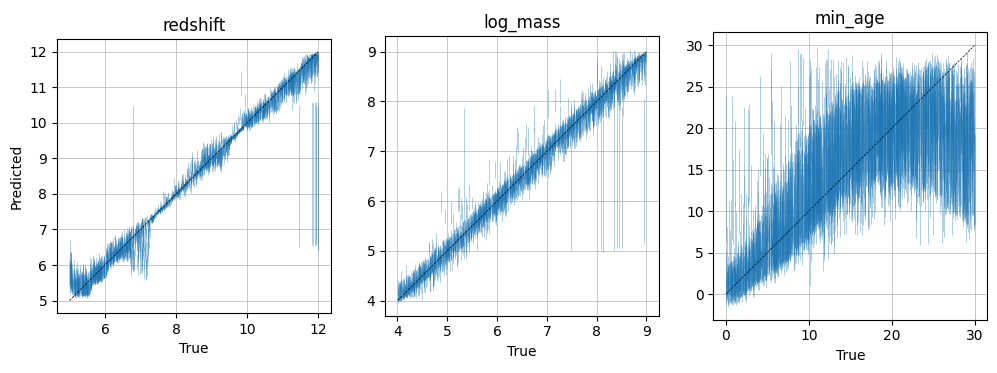

INFO:matplotlib.mathtext:Substituting symbol E from STIXNonUnicode


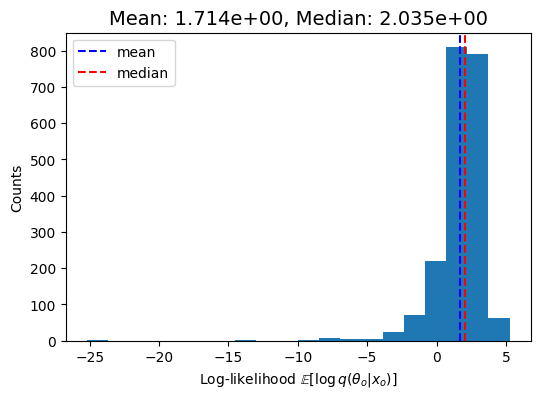

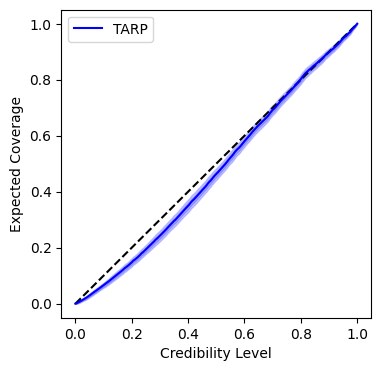

In [100]:
second_fitter.run_single_sbi(engine='NPE', learning_rate=5e-4, set_self=False, model_type='nsf', backend='lampe', num_transforms=6, 
                                    plot=True, name_append='_NPE1_no_unc', save_model=True)

In [103]:
params = second_fitter.sample_posterior(X_test=full_array)

quantiles = np.quantile(params, [0.16, 0.5, 0.84], axis=0)

print(quantiles)

INFO:root:Sampling models with [1000] samples each.
Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

[[ 5.99295025  4.72449245  5.29538511]
 [ 8.53030348  6.41648483 15.74619389]
 [10.88760799  8.16437248 25.12509575]]


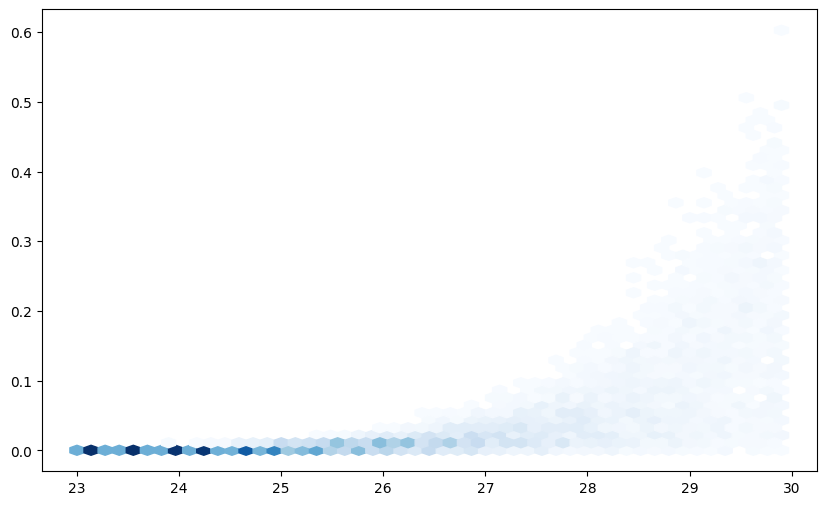

In [203]:
# Draw depths from a normal distribution.
depth_centers = [30 if second_fitter.raw_photometry_names[i].endswith('W') else 29.5 for i in range(len(filters))]

depths_jy = 10**((np.array(depth_centers)-8.90)/-2.5) * Jy # 30 AB mag in all 22 filters



filter = 'NIRCam.F444W'
depth_centers = 30

depths_jy = 10**((np.array(depth_centers)-8.90)/-2.5) * u.Jy # 30 AB mag in all 22 filters
depths_jy = depths_jy.to(u.nJy).value
ndraws = 100
# plot sigma as a function of flux
fluxs = np.arange(23, 30, 0.1)
flux_jy = fluxs * u.ABmag

flux_jy = flux_jy.to(u.nJy).value  # Convert to Jy

error = np.random.normal(loc=0, scale=depths_jy, size=(ndraws, len(fluxs)))  # Simulated errors based on the depth


error_ab = np.log10(1 + np.abs((error/flux_jy))) # Convert to log10 flux error

plt.figure(figsize=(10, 6))

# do a hexbin

plt.hexbin(fluxs, error_ab, gridsize=50, cmap='Blues', mincnt=1)


In [177]:
import numpy as np
from scipy.interpolate import interp1d
from scipy import stats
from typing import Tuple, List, Union, Optional, Callable

class EmpiricalUncertaintyModel:
    """
    A class to model and sample photometric uncertainties based on an empirical
    distribution derived from observed fluxes and their uncertainties.

    The model estimates p(sigma_X | f_X) as a Gaussian N(mu_sigma_X(f_X), sigma_sigma_X(f_X)),
    where mu_sigma_X and sigma_sigma_X are interpolated from binned statistics of
    observed (sigma_X, f_X) pairs.
    """

    def __init__(
        self,
        observed_fluxes: np.ndarray,
        observed_errors: np.ndarray,
        num_bins: int = 20,
        flux_bins: Optional[np.ndarray] = None,
        log_bins: bool = True,
        min_flux_for_binning: Optional[float] = None,
        min_samples_per_bin: int = 10
    ):
        """
        Initializes the model by building interpolators for the mean and
        standard deviation of observed errors as a function of flux.

        Args:
            observed_fluxes: 1D array of fluxes from a real survey.
            observed_errors: 1D array of corresponding flux uncertainties.
            num_bins: Number of bins to use for flux if flux_bins is not provided.
            flux_bins: Optional array defining the edges of flux bins.
                       If None, bins are created based on num_bins and log_bins.
            log_bins: If True and flux_bins is None, bins will be spaced
                      logarithmically. Otherwise, linearly.
            min_flux_for_binning: If provided, only fluxes above this value are
                                  used for creating the interpolation model.
                                  This can help avoid issues with very low/zero fluxes.
            min_samples_per_bin: Minimum number of samples required in a bin
                                 for it to be considered valid for interpolation.
        """
        if len(observed_fluxes) != len(observed_errors):
            raise ValueError("observed_fluxes and observed_errors must have the same length.")

        valid_mask = np.isfinite(observed_fluxes) & np.isfinite(observed_errors) & (observed_errors > 0)
        if min_flux_for_binning is not None:
            valid_mask &= (observed_fluxes > min_flux_for_binning)

        fluxes = observed_fluxes[valid_mask]
        errors = observed_errors[valid_mask]

        if len(fluxes) < min_samples_per_bin * 2 : # Need at least two bins for interpolation
             raise ValueError(
                f"Not enough valid data points ({len(fluxes)}) to build the model "
                f"with min_samples_per_bin={min_samples_per_bin}. "
                "Consider adjusting min_flux_for_binning or providing more data."
            )


        if flux_bins is None:
            if log_bins:
                # Ensure fluxes are positive for log binning
                positive_flux_mask = fluxes > 0
                if not np.any(positive_flux_mask):
                    raise ValueError("No positive fluxes available for log binning. Try linear bins or check data.")
                min_f = np.min(fluxes[positive_flux_mask])
                max_f = np.max(fluxes[positive_flux_mask])
                if min_f <= 0: # Should be caught by positive_flux_mask, but as safeguard
                    min_f = np.partition(fluxes[positive_flux_mask], 1)[1] if len(fluxes[positive_flux_mask]) > 1 else 1e-9
                flux_bins = np.logspace(np.log10(min_f), np.log10(max_f), num_bins + 1)
            else:
                min_f = np.min(fluxes)
                max_f = np.max(fluxes)
                flux_bins = np.linspace(min_f, max_f, num_bins + 1)
        
        self.flux_bins_centers: List[float] = []
        bin_median_errors: List[float] = []
        bin_std_errors: List[float] = []

        for i in range(len(flux_bins) - 1):
            low_f, high_f = flux_bins[i], flux_bins[i+1]
            # Ensure the last bin includes the maximum value
            if i == len(flux_bins) - 2:
                 mask = (fluxes >= low_f) & (fluxes <= high_f)
            else:
                 mask = (fluxes >= low_f) & (fluxes < high_f)

            errors_in_bin = errors[mask]

            if len(errors_in_bin) >= min_samples_per_bin:
                self.flux_bins_centers.append(low_f + (high_f - low_f) / 2.0) # Bin center
                bin_median_errors.append(np.median(errors_in_bin))
                bin_std_errors.append(np.std(errors_in_bin))

        if len(self.flux_bins_centers) < 2: # Need at least two points for interpolation
            raise ValueError(
                f"Could not create enough valid bins ({len(self.flux_bins_centers)}) "
                f"for interpolation with min_samples_per_bin={min_samples_per_bin}. "
                "Try reducing num_bins, adjusting flux_bins, or min_flux_for_binning."
            )

        self.flux_bins_centers = np.array(self.flux_bins_centers)
        # Store the flux range for which the model is considered valid
        self._min_interp_flux = self.flux_bins_centers[0]
        self._max_interp_flux = self.flux_bins_centers[-1]


        # Use 'bounds_error=False' and 'fill_value' to handle extrapolation.
        # For sigma_sigma_X (std of errors), it should not be negative.
        # We use the value from the closest bin if extrapolating.
        self.mu_sigma_interpolator: Callable[[Union[float, np.ndarray]], Union[float, np.ndarray]] = interp1d(
            self.flux_bins_centers, bin_median_errors, kind='linear',
            bounds_error=False, fill_value=(bin_median_errors[0], bin_median_errors[-1])
        )
        self.sigma_sigma_interpolator: Callable[[Union[float, np.ndarray]], Union[float, np.ndarray]] = interp1d(
            self.flux_bins_centers, bin_std_errors, kind='linear',
            bounds_error=False, fill_value=(bin_std_errors[0], bin_std_errors[-1])
        )
        
        # Ensure sigma_sigma (the std dev of the error distribution) is not negative after interpolation
        # by wrapping the interpolator.
        original_sigma_sigma_interpolator = self.sigma_sigma_interpolator
        def non_negative_sigma_sigma_interpolator(flux_values):
            std_devs = original_sigma_sigma_interpolator(flux_values)
            if isinstance(std_devs, np.ndarray):
                std_devs[std_devs < 0] = 0
            elif std_devs < 0: # scalar
                std_devs = 0
            return std_devs
        self.sigma_sigma_interpolator = non_negative_sigma_sigma_interpolator


    def get_valid_flux_range(self) -> Tuple[float, float]:
        """Returns the flux range for which the interpolator was built."""
        return self._min_interp_flux, self._max_interp_flux

    def sample_uncertainty(
        self,
        true_flux: Union[float, np.ndarray],
        max_resamples_for_positive_sigma: int = 5
    ) -> Union[float, np.ndarray, None]:
        """
        Samples a 'fake' uncertainty (sigma_prime_X) for a given true flux.

        Args:
            true_flux: The true flux value(s) for which to sample an uncertainty.
            max_resamples_for_positive_sigma: How many times to try resampling if a
                                              negative sigma_prime_X is drawn.

        Returns:
            The sampled uncertainty (sigma_prime_X). Returns np.nan for scalar input
            or an array with np.nan for problematic inputs if a positive sigma
            cannot be sampled after max_resamples.
        """
        is_scalar = np.isscalar(true_flux)
        flux_array = np.atleast_1d(true_flux)
        sampled_sigmas = np.empty_like(flux_array)

        mu_sigma_values = self.mu_sigma_interpolator(flux_array)
        sigma_sigma_values = self.sigma_sigma_interpolator(flux_array) # Already ensures non-negativity

        for i in range(len(flux_array)):
            mu_s = mu_sigma_values[i]
            sig_s = sigma_sigma_values[i]
            
            # Handle cases where true_flux might be outside the reliable interpolation range
            # The interpolators use fill_value, but we might want to flag this.
            # For this example, we proceed with the extrapolated/filled values.

            sigma_prime_x = -1.0  # Initialize to a non-physical value
            for _ in range(max_resamples_for_positive_sigma):
                sigma_prime_x = stats.norm.rvs(loc=mu_s, scale=sig_s)
                if sigma_prime_x > 0:
                    break
            
            if sigma_prime_x <= 0:
                # Could raise an error, return a default, or NaN as per literature's removal rule.
                # Returning NaN indicates the calling code should handle removal.
                # print(f"Warning: Could not sample a positive sigma for flux {flux_array[i]} "
                #       f"(mu_sigma={mu_s:.2e}, sigma_sigma={sig_s:.2e}). Assigning NaN.")
                sampled_sigmas[i] = np.nan
            else:
                sampled_sigmas[i] = sigma_prime_x
        
        return sampled_sigmas[0] if is_scalar else sampled_sigmas

    def apply_noise_to_flux(
        self,
        true_flux: Union[float, np.ndarray],
        max_resamples_for_positive_sigma: int = 5
    ) -> Tuple[Union[float, np.ndarray, None], Union[float, np.ndarray, None]]:
        """
        Applies noise to a true flux by first sampling an uncertainty
        and then adding Gaussian noise.

        Args:
            true_flux: The true flux value(s).
            max_resamples_for_positive_sigma: Passed to sample_uncertainty.

        Returns:
            A tuple (noisy_flux, sampled_sigma_prime).
            Returns (np.nan, np.nan) for problematic inputs where positive sigma
            could not be determined.
        """
        is_scalar = np.isscalar(true_flux)
        flux_array = np.atleast_1d(true_flux)

        sampled_sigma_prime = self.sample_uncertainty(flux_array, max_resamples_for_positive_sigma)
        
        noisy_flux_array = np.empty_like(flux_array)

        for i in range(len(flux_array)):
            if np.isnan(sampled_sigma_prime[i]):
                noisy_flux_array[i] = np.nan
            else:
                noise = stats.norm.rvs(loc=0, scale=sampled_sigma_prime[i])
                noisy_flux_array[i] = flux_array[i] + noise
        
        if is_scalar:
            return noisy_flux_array[0], sampled_sigma_prime[0]
        return noisy_flux_array, sampled_sigma_prime

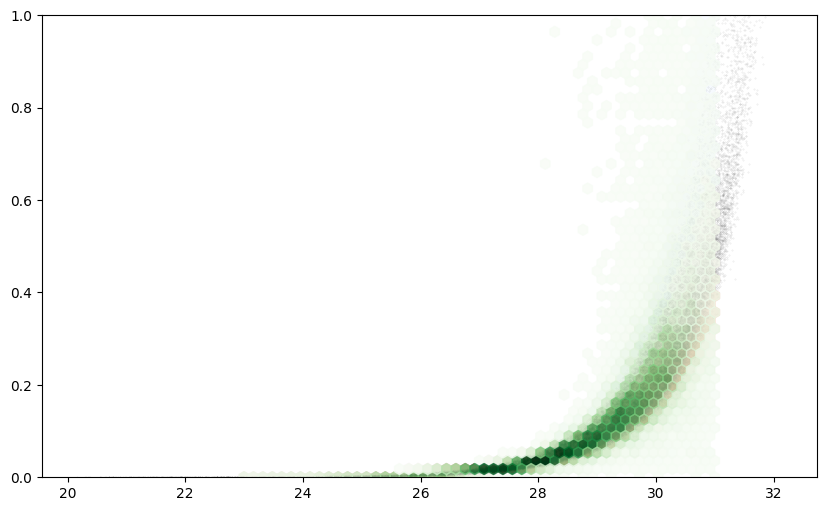

In [206]:
file = '/home/tharvey/Downloads/JADES-Deep-GS_MASTER_Sel-f277W+f356W+f444W_v9_loc_depth_masked_10pc_EAZY_matched_selection_ext_src_UV.fits'

from astropy.table import Table

table = Table.read(file)

band = 'f444W'

flux = table[f'MAG_APER_{band}_aper_corr'][:, 0]  
flux_err_l = table[f'MAGERR_APER_{band}_l1_loc_depth'][:, 0]
flux_err_u = table[f'MAGERR_APER_{band}_u1_loc_depth'][:, 0]
# drop NaNs and -99's

mask = (flux != -99) & (flux_err_l != -99) & (flux_err_u != -99) & (flux > 0) & (flux_err_l > 0) & (flux_err_u > 0)
flux = flux[mask]
flux_err_l = flux_err_l[mask]
flux_err_u = flux_err_u[mask]

# bin and plot as contour
plt.figure(figsize=(10, 6))

plt.hexbin(flux, flux_err_l, gridsize=50, cmap='Blues', mincnt=1, extent=(23, 31, 0, 1), alpha=0.75)
plt.hexbin(flux, flux_err_u, gridsize=50, cmap='Reds', mincnt=1, extent=(23, 31, 0, 1), alpha=0.75)
plt.scatter(flux, (flux_err_l + flux_err_u) / 2, alpha=0.1, color='black', s=0.1)
plt.ylim(0, 1)

from ltu_ili_testing import EmpiricalUncertaintyModel

noise_model = EmpiricalUncertaintyModel(flux, (flux_err_l + flux_err_u) / 2, num_bins=20, log_bins=True)
noisy_flux, sampled_sigma = noise_model.apply_noise_to_flux(flux, max_sigma_deviation=10)

#plt.scatter(noisy_flux, sampled_sigma, alpha=0.1, color='green', s=0.1)
plt.hexbin(noisy_flux, sampled_sigma, gridsize=50, cmap='Greens', mincnt=1, extent=(23, 31, 0, 1), alpha=0.75)

